<a href="https://colab.research.google.com/github/yuwei-jpg/CourseSera_Practice/blob/main/ai1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CS4618_Assignment1_Predict Online Shopping Purchasing

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from seaborn import lmplot, stripplot,boxplot
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

# read the dataset_shopping.csv.
df = pd.read_csv( "../dataset_shopping.csv")

# show the dimension of file.
df.shape

(12330, 18)

In [85]:
# show the different features.
df.columns

Index(['admin_num_pages', 'admin_duration', 'info_num_pages', 'info_duration',
       'prod_num_pages', 'prod_duration', 'bounce_rate', 'exit_rate',
       'page_value', 'special_day', 'month', 'operating_system', 'browser',
       'region', 'referrer', 'visitor', 'weekend', 'purchase'],
      dtype='object')

In [86]:
# show the datatypes.
df.dtypes

,0
admin_num_pages,int64
admin_duration,float64
info_num_pages,int64
info_duration,float64
prod_num_pages,int64
prod_duration,float64
bounce_rate,float64
exit_rate,float64
page_value,float64
special_day,float64


In [87]:
# The columns and datatypes (again) but also whether there are any nulls in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   admin_num_pages   12330 non-null  int64  
 1   admin_duration    12330 non-null  float64
 2   info_num_pages    12330 non-null  int64  
 3   info_duration     12330 non-null  float64
 4   prod_num_pages    12330 non-null  int64  
 5   prod_duration     12330 non-null  float64
 6   bounce_rate       12330 non-null  float64
 7   exit_rate         12330 non-null  float64
 8   page_value        12330 non-null  float64
 9   special_day       12330 non-null  float64
 10  month             12330 non-null  object 
 11  operating_system  12330 non-null  int64  
 12  browser           12330 non-null  int64  
 13  region            12330 non-null  int64  
 14  referrer          12330 non-null  int64  
 15  visitor           12330 non-null  object 
 16  weekend           12330 non-null  bool  

In [ ]:
# summary statistics
df.describe(include="all")

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,page_value,special_day,month,operating_system,browser,region,referrer,visitor,weekend,purchase
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


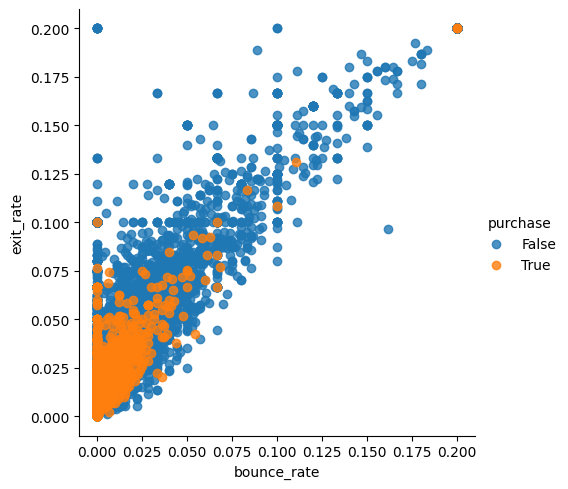

In [88]:
# The lower exit rate and bounce_rate, the more possible that the customer pruchases
plot = sns.lmplot(x="bounce_rate", y="exit_rate", hue="purchase", data=df, fit_reg=False)

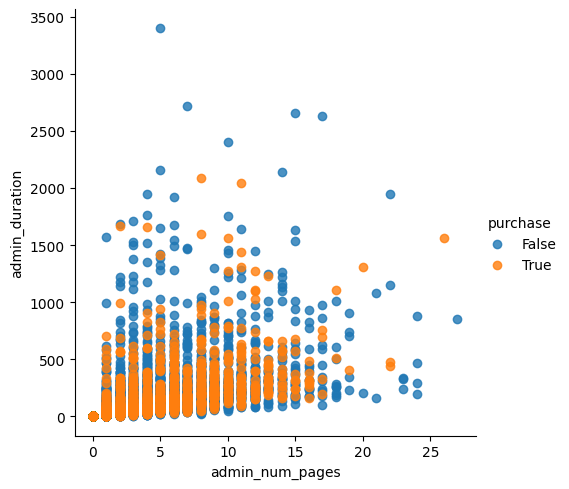

In [89]:
plot1 = sns.lmplot(x="admin_num_pages", y="admin_duration", hue="purchase", data=df, fit_reg=False)

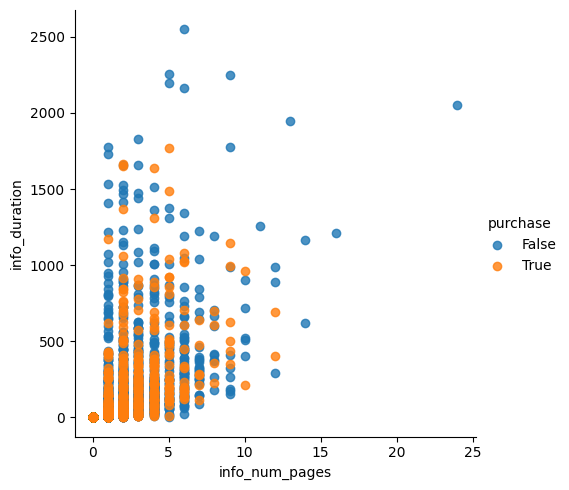

In [90]:
plot2 = sns.lmplot(x="info_num_pages", y="info_duration", hue="purchase", data=df, fit_reg=False)

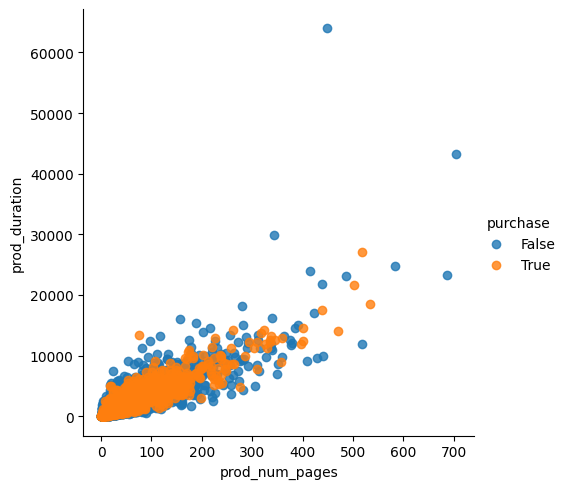

In [91]:
plot3 = sns.lmplot(x="prod_num_pages", y="prod_duration", hue="purchase", data=df, fit_reg=False)

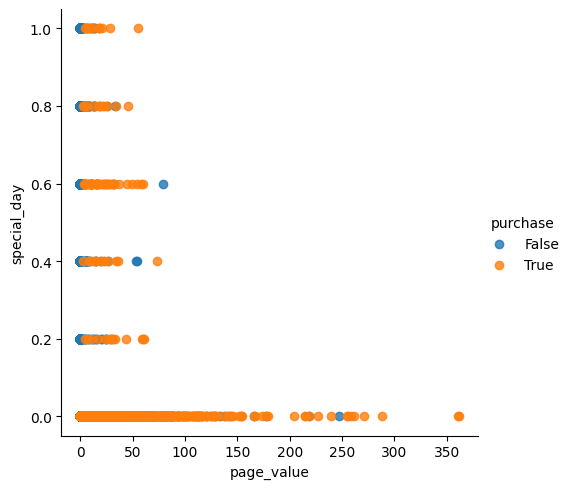

In [92]:
# It shows that customer seems to purchase mostly during none special day (not closer actually)
plot4 = sns.lmplot(x="page_value",y="special_day" ,hue="purchase", data=df, fit_reg=False)

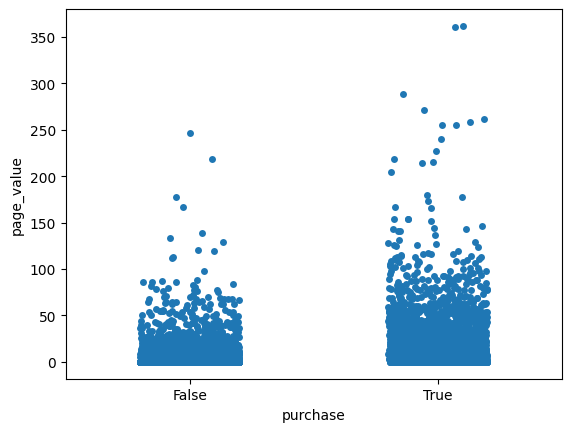

In [93]:
# It shows that there is no obvious relationship between pruchase and page value
plot = stripplot(x="purchase", y="page_value", data=df, jitter=0.2)

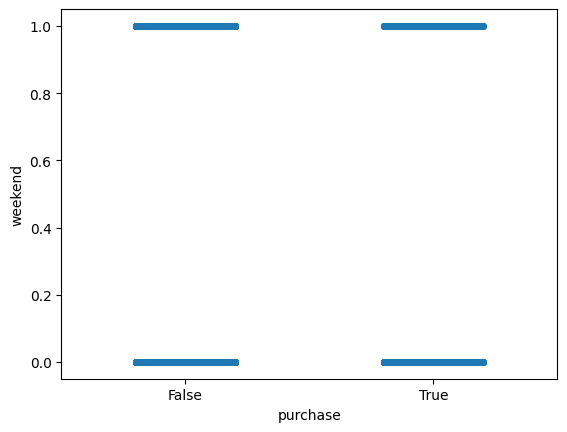

In [94]:
plot = stripplot(x="purchase", y="weekend", data=df, jitter=0.2)

### Using instance-based learning for classification

In [95]:
# The features (I deleted some of the features
# including month, page_value,visitor,weekend,operating system, browser, region, reffer)

features = ["admin_num_pages", "admin_duration","info_num_pages","info_duration","prod_num_pages","prod_duration",
            "bounce_rate","exit_rate","special_day"]

# Extract these features and convert to numpy 2D array
X = df[features].values

# Standardization of X
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["purchase"])

In [96]:
# an odd k in kNN classification helps ensure a clear decision by reducing the possibility of ties in the majority voting process
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_scaled, y)

KNeighborsClassifier()

In [97]:
# wrap each value within a list to make them a sequence
customer_df = pd.DataFrame({"admin_num_pages":[5], "admin_duration":[10],"info_num_pages":[10],"info_duration":[2],"prod_num_pages":[3],"prod_duration":[1],
            "bounce_rate":[0.2],"exit_rate":[0.2],"special_day":[0]})

customer = customer_df.values

predict = knn.predict(customer)

label = label_encoder.inverse_transform(predict)

print("The rabel is",label[0])

The rabel is True


### Data Cleaning


In [25]:
# read the dataset_shopping.csv.
df = pd.read_csv( "../dataset_shopping.csv")

features0=["admin_num_pages", "admin_duration","info_num_pages","info_duration","prod_num_pages","prod_duration",
            "bounce_rate","exit_rate","special_day","month","page_value","visitor","weekend","operating_system", "browser", "region", "referrer"]


numeric_features = ["admin_num_pages", "admin_duration", "info_num_pages", "info_duration",
                    "prod_num_pages", "prod_duration", "bounce_rate", "exit_rate",
                    "special_day", "page_value","operating_system", "browser", "region", "referrer"]

nominal_features = ["month","visitor"]

df["weekend"] = df["weekend"].astype(int)

# # using one-hot encoding
# df = pd.get_dummies(df, columns=["operating_system", "browser", "region", "referrer"], drop_first=True)

# scaler = StandardScaler()
# df[numeric_features] = scaler.fit_transform(df[numeric_features])


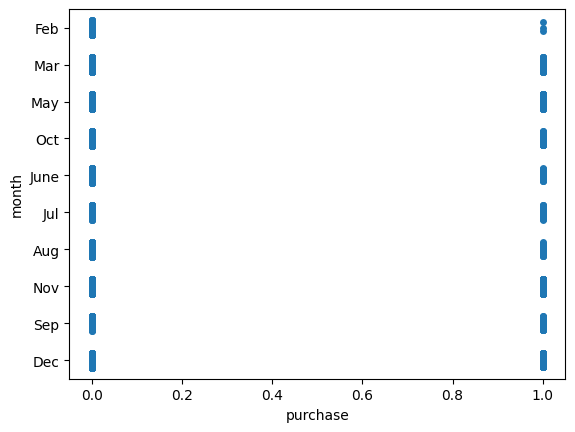

In [125]:
plot = stripplot(x="purchase", y="month", data=df, jitter=0.2)

In [26]:
# clean the noise
df = df[(df["admin_num_pages"] < 25) &
        (df["admin_duration"] < 2500) &
        (df["info_num_pages"] <= 15) &
        (df["info_duration"] <=2000) &
        (df["prod_num_pages"] < 600) &
        (df["prod_duration"] < 40000) &
        (df["page_value"] <= 300)].copy()


# Reset the index
df.reset_index(drop=True, inplace=True)

# Check the invalid data was filtered out
df.shape


(12316, 18)

### Dataset Exploration

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,special_day,page_value,operating_system,browser,region,referrer
admin_num_pages,1.000000,0.599996,0.377925,0.259096,0.424120,0.367222,-0.222720,-0.317228,-0.094479,0.103135,-0.007742,-0.026890,-0.012241,-0.027303
admin_duration,0.599996,1.000000,0.276724,0.223437,0.272983,0.337263,-0.144766,-0.207231,-0.074801,0.071291,-0.008938,-0.013789,-0.012647,-0.014848
info_num_pages,0.377925,0.276724,1.000000,0.607241,0.368733,0.366995,-0.117022,-0.166389,-0.047662,0.044230,-0.009880,-0.039134,-0.023352,-0.034565
info_duration,0.259096,0.223437,0.607241,1.000000,0.277986,0.338121,-0.072744,-0.104034,-0.027276,0.029632,-0.010184,-0.023631,-0.022967,-0.023380
prod_num_pages,0.424120,0.272983,0.368733,0.277986,1.000000,0.856221,-0.206398,-0.296141,-0.023395,0.051709,0.000391,-0.020074,-0.048436,-0.039947
prod_duration,0.367222,0.337263,0.366995,0.338121,0.856221,1.000000,-0.186591,-0.256277,-0.032818,0.050892,0.001344,-0.012997,-0.041829,-0.038005
bounce_rate,-0.222720,-0.144766,-0.117022,-0.072744,-0.206398,-0.186591,1.000000,0.910346,0.071014,-0.120053,0.029153,-0.016302,-0.006630,0.076484
exit_rate,-0.317228,-0.207231,-0.166389,-0.104034,-0.296141,-0.256277,0.910346,1.000000,0.103920,-0.177720,0.022121,-0.004383,-0.007703,0.076283
special_day,-0.094479,-0.074801,-0.047662,-0.027276,-0.023395,-0.032818,0.071014,0.103920,1.000000,-0.062893,0.006828,0.009862,-0.016597,0.058720
page_value,0.103135,0.071291,0.044230,0.029632,0.051709,0.050892,-0.120053,-0.177720,-0.062893,1.000000,0.027351,0.050943,0.008640,0.023614


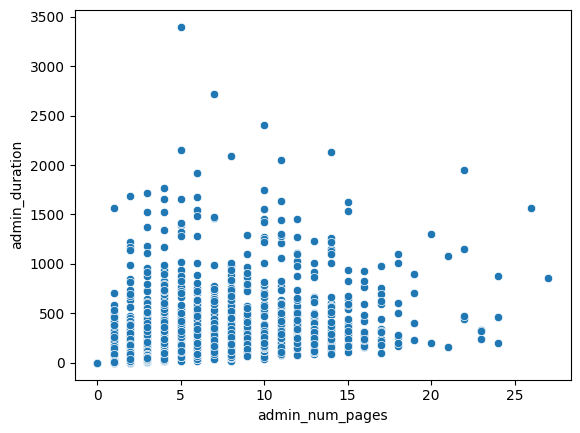

In [97]:
# Split off the test set: 20% of the dataset.
dev_df, test_df = train_test_split(df, train_size=0.8, random_state=2)

copy_df = dev_df.copy()

plot = sns.scatterplot(x="admin_num_pages", y="admin_duration", data=copy_df)

# from this chart we can see that the admin_num_pages and admin_duration have higher correlation rate.
# same as info_num_pages and info_duration
# same as prod_num_pages and prod_duration
# same as bounce_rate amd exit rate
copy_df[numeric_features].corr()


<Axes: >

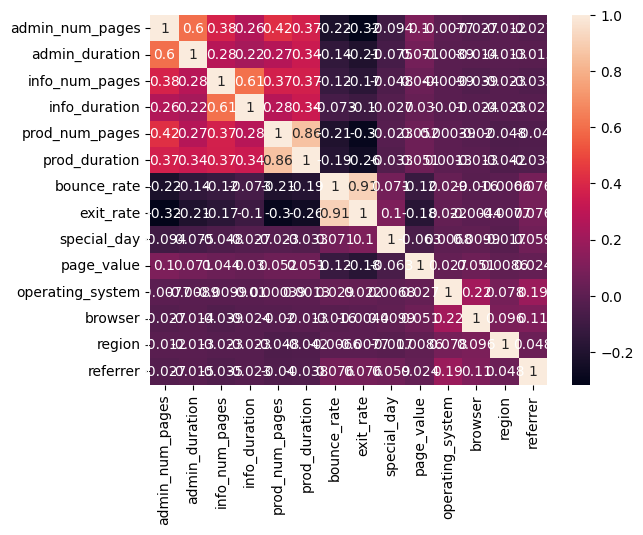

In [90]:
sns.heatmap(copy_df[numeric_features].corr(), annot=True)

In [ ]:
# just in case that the admin_num_pages is 0 replace the 0 with 1 and calculate the average time per page
df['avg_duration_per_page'] = df['admin_duration'] / df['admin_num_pages'].replace(0, 1)

df['avg_duration_per_infoPage'] = df['info_duration'] / df['info_num_pages'].replace(0, 1)

df['avg_duration_per_prodPage'] = df['prod_duration'] / df['prod_num_pages'].replace(0, 1)

# the reason why I use plus instead of multiplication is that the combination of multiplication features might be overfitting or adds too much complexity
df['combined_rate'] = df['bounce_rate'] + df['exit_rate']

### Data preprocessing in scikit-learn


In [95]:
class InsertAPP(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.insert:
            X['avg_duration_per_page'] = X['admin_duration'] / X['admin_num_pages'].replace(0, 1)

            # If the new feature is intended to replace the existing ones,
            # # you could drop the existing ones here
            # X.drop(["admin_duration", "admin_nim_pages"], axis=1)

            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X


In [7]:
class InsertAPIP(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.insert:
            X['avg_duration_per_infoPage'] = X['info_duration'] / X['info_num_pages'].replace(0, 1)
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [8]:
class InsertAPPP(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.insert:
            X['avg_duration_per_prodPage'] = X['prod_duration'] / X['prod_num_pages'].replace(0, 1)
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [10]:
class InsertCR(BaseEstimator, TransformerMixin):

    def __init__(self, insert=True):
        self.insert = insert

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.insert:
            X['combined_rate'] = X['bounce_rate'] + X['exit_rate']
            X = X.replace( [ np.inf, -np.inf ], np.nan )
        return X

In [31]:
class ScalerSelector(BaseEstimator, TransformerMixin):

    def __init__(self, scaler=None):
        self.scaler = scaler

    def fit(self, X, y=None):
        if self.scaler:
            self.scaler.fit(X, y)
        return self

    def transform(self, X, y=None):
        if self.scaler:
            return self.scaler.transform(X)
        else:
            return X

In [93]:
# Create the preprocessor
preprocessor = ColumnTransformer([
        ("num", Pipeline([("avg_duration_per_page", InsertAPP()),
                          ("avg_duration_per_infoPage", InsertAPIP()),
                          ("avg_duration_per_prodPage", InsertAPPP()),
                          ("combined_rate", InsertCR()),
                          ("imputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("scaler", ScalerSelector())]),
                numeric_features),
        ("nom", Pipeline([("imputer", SimpleImputer(missing_values=np.nan, strategy="most_frequent")),
                          ("binarizer", OneHotEncoder(handle_unknown="ignore"))]),
                nominal_features),
        # "weekend" is passed in as a binary feature
                ("weekend", "passthrough", ["weekend"])],

        remainder="drop")

### Prepare for model selection

In [81]:
# Extract the features but leave as a DataFrame
dev_X = dev_df[features0]
test_X = test_df[features0]

# Target values, encoded and converted to a 1D numpy array
label_encoder = LabelEncoder()
label_encoder.fit(df["purchase"])
dev_y = label_encoder.transform(dev_df["purchase"])
test_y = label_encoder.transform(test_df["purchase"])
dev_X.head()

,admin_num_pages,admin_duration,info_num_pages,info_duration,prod_num_pages,prod_duration,bounce_rate,exit_rate,special_day,month,page_value,visitor,weekend,operating_system,browser,region,referrer
6183,0,0.000000,0,0.0,3,50.400000,0.000000,0.066667,0.0,Jul,0.000000,Returning_Visitor,False,2,2,3,1
9253,9,65.166667,0,0.0,123,5969.573168,0.001538,0.013923,0.0,Nov,10.692380,New_Visitor,False,2,1,1,2
2927,0,0.000000,1,44.0,14,549.500000,0.000000,0.013333,0.2,May,43.252000,New_Visitor,False,2,4,1,2
7192,7,204.100000,0,0.0,5,128.700000,0.000000,0.012500,0.0,Sep,0.000000,New_Visitor,False,2,7,1,2
3869,2,25.500000,0,0.0,13,908.500000,0.000000,0.013333,0.0,May,19.785333,Returning_Visitor,True,3,2,4,1


In [46]:
# Let's see how a majority-class classifier performs.
# This is our baseline. We need to do better than this!

maj = DummyClassifier()
maj.fit(dev_X, dev_y)
accuracy_score(test_y, maj.predict(test_X))

0.8482142857142857

In [96]:
# Create a pipeline that combines the preprocessor with kNN
knn = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", KNeighborsClassifier())])

# Create a dictionary of hyperparameters for kNN
knn_param_grid = {"predictor__n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  "preprocessor__num__avg_duration_per_page__insert": [True, False],
                  "preprocessor__num__avg_duration_per_infoPage__insert": [True, False],
                  "preprocessor__num__avg_duration_per_prodPage__insert": [True, False],
                  "preprocessor__num__combined_rate__insert": [True, False],
                  "preprocessor__num__scaler__scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()]}

# Create the grid search object which will find the best hyperparameter values based on validation error
# Regression: The purpose of using neg_mean_absolute_error is to minimize the prediction error, which reflects the difference between the predicted value and the true value.
# Classification: Accuracy is used to measure the correctness of the prediction, reflecting the proportion of samples that the model classifies correctly.
knn_gs = GridSearchCV(knn, knn_param_grid, scoring="accuracy", cv=10, refit=True)

# Run grid search by calling fit. It will also re-train on train+validation using the best parameters.
knn_gs.fit(dev_X, dev_y)

# Let's see how well we did
knn_gs.best_params_, knn_gs.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2400 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2400 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 469, in fit
    Xt = self._fit(X, y, routed_params)
  File "/usr/local/lib/python3.10/dist-packag

({'predictor__n_neighbors': 9,
  'preprocessor__num__avg_duration_per_infoPage__insert': True,
  'preprocessor__num__avg_duration_per_page__insert': False,
  'preprocessor__num__avg_duration_per_prodPage__insert': True,
  'preprocessor__num__combined_rate__insert': True,
  'preprocessor__num__scaler__scaler': RobustScaler()},
 0.8911191329062806)



*   the result shows that the best parameter is 9
*   the avg_duration_per_prodPage__insert and combined_rate__insert are not used under the circumstances of using this best parameter




In [56]:
# the training accuracy high and validation accuracy low (overfitting)
# the training accuracy and validation accuracy low (underfitting)
# in this case the training acc and validation acc is close which indicates that the model fit is good
knn.set_params(**knn_gs.best_params_)
scores = cross_validate(knn, dev_X, dev_y, cv=10,
                        scoring="accuracy", return_train_score=True)
print("Training accuracy: ", np.mean(scores["train_score"]))
print("Validation accuracy: ", np.mean(scores["test_score"]))

Training accuracy:  0.9051405115437392
Validation accuracy:  0.8896653658837945


In [55]:
# Create a pipeline that combines the preprocessor with logistic regression
# The Logistic Regression model is difficult to converge due to the high complexity of data characteristics or features.
logistic = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor", LogisticRegression(solver="saga", max_iter=5000, C=10))])


# Create the grid search object which will find the best hyperparameter values based on validation error
np.mean(cross_val_score(logistic, dev_X, dev_y, scoring="accuracy", cv=10))

0.8790085563369404

### Try on XGBoost Scikit-Learn

In [58]:
# XGBoost resource website
# https://machinelearningmastery.com/extreme-gradient-boosting-ensemble-in-python/
!pip install xgboost
import xgboost

In [59]:
print(xgboost.__version__)

2.1.1


In [72]:
# the XGBoost doesn't support the type object, it usually expect numerical input

# Frequency encoding for 'visitor' and 'month'
visitor_counts = dev_X['visitor'].value_counts(normalize=True)
month_counts = dev_X['month'].value_counts(normalize=True)

dev_X['visitor_encoded'] = dev_X['visitor'].map(visitor_counts)
dev_X['month_encoded'] = dev_X['month'].map(month_counts)

# so we can use one-hot encoding or get_dummies function
# dev_X = pd.get_dummies(dev_X, columns=['month', 'visitor'], prefix=['month', 'visitor'])


Index(['admin_num_pages', 'admin_duration', 'info_num_pages', 'info_duration',
       'prod_num_pages', 'prod_duration', 'bounce_rate', 'exit_rate',
       'special_day', 'month', 'page_value', 'visitor', 'weekend',
       'operating_system', 'browser', 'region', 'referrer'],
      dtype='object')


In [82]:
print(dev_X.columns)

Index(['admin_num_pages', 'admin_duration', 'info_num_pages', 'info_duration',
       'prod_num_pages', 'prod_duration', 'bounce_rate', 'exit_rate',
       'special_day', 'month', 'page_value', 'visitor', 'weekend',
       'operating_system', 'browser', 'region', 'referrer'],
      dtype='object')


In [83]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier


# define the model(without these hyperparameters the model is overfitting)
model = Pipeline([
    ("preprocessor", preprocessor),
    ("predictor",XGBClassifier(
    max_depth=3,
    min_child_weight=5,
    learning_rate=0.01,
    n_estimators=1000,
    reg_alpha=1,
    reg_lambda=1))
    ])
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate the model and collect the scores
n_scores = cross_val_score(model, dev_X, dev_y, scoring='accuracy', cv=cv, n_jobs=-1)
# report the model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.905 (0.008)


In [84]:
# the XGBoost works better than knn
scores = cross_validate(model, dev_X, dev_y, scoring='accuracy', cv=cv, n_jobs=-1, return_train_score=True)

print('Training Accuracy: %.3f (%.3f)' % (mean(scores['train_score']), std(scores['train_score'])))
print('Validation Accuracy: %.3f (%.3f)' % (mean(scores['test_score']), std(scores['test_score'])))

Training Accuracy: 0.917 (0.001)
Validation Accuracy: 0.905 (0.008)




*   the result of training acc is 0.917 and validation acc is 0.905. they are very close and both are high so we can judge that the model preforms well




### Test on the test set

In [86]:
model.fit(dev_X, dev_y)

y_pred = model.predict(test_X)

# calculate the test set accuracy
test_accuracy = accuracy_score(test_y, y_pred)
print("Test Accuracy:", test_accuracy)

# output a classification report
print("\nClassification Report:\n", classification_report(test_y, y_pred))

# output confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(test_y, y_pred))

Test Accuracy: 0.9071370640713706

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95      2116
           1       0.69      0.63      0.66       350

    accuracy                           0.91      2466
   macro avg       0.81      0.79      0.80      2466
weighted avg       0.90      0.91      0.91      2466


Confusion Matrix:
 [[2018   98]
 [ 131  219]]


From the testing result we can see that:


*   the total test accuracy is 90.713 %
 which means that the model performs well
*   the classification report shows that the prediction on category 0 is better than category 1
*   the confusion matrix shows that the quantity of category 1 is less than category 0 which causes the class imbalance

Therefore, if we give the model the real data to predict whether the customer will purchase or not the model is about 91% accurate in determining whether a user will make a purchase. (if the customer actually won't purchase them the model has higher probability to predict the cistomer will not buy correctly. By contrast, dentifying purchase behavior (class 1), the model performs slightly worse)
